# Importing Required libraries

In [1]:
#Importing libraries

#Library to work on dataframes
import pandas as pd

#Library to work on arrys and numbers
import numpy as np

#Library used for reading files and accessing elements from system
import os

#Libraries for NLP

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

#Stemming the words

from nltk.stem import WordNetLemmatizer
import openpyxl
import string

##Library to display graphs

from IPython.display import display

#Library to know the time taken to implement a code
from tqdm import tqdm
from collections import Counter

#Library to abstarct grammer syntax
import ast

#Libraries to display graphs

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

#Word Tokenizing libraies

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

#Library to display statistics
import scipy.stats as stats

#Machine learning libraries of LDA for creating topics from given sentences
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

#Library to display output file

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

# Declaring varibles and defining functions

In [2]:
#Declaring Tokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [3]:
#Declaring lematizer

lemmatizer = WordNetLemmatizer()

In [4]:
#Downloading stop words : One time download is enough

#nltk.download('stopwords')

#Importing stop words from libabray

from nltk.corpus import stopwords

In [5]:
#Downloading wordnet: One time downloading is enough

#nltk.download('wordnet')

In [6]:
#Writing a defination to remove stop words: Stop words include word that doesnt make any difference in meaning : Example And 

def remove_stopwords(df_text):
    words = [w for w in df_text if w not in stopwords.words('english')]
    return words

In [7]:
# Building a defination for lemmatizer. It is built to get the word in right format in there original format: Example 
# cleared-->clear

def word_lemmatizer(df_text):
    lem_text = [lemmatizer.lemmatize(i) for i in df_text]
    return lem_text

# Reading the dataset

In [8]:
#They are many types of csv files that are used whic  are in different format. Example utf8. Here I am using pandas to read csv
# and specifying  cp1252 encoding method to decode csv file 

df=pd.read_csv(r"C:\Users\sumat\Downloads\100 Indian Mission statement.csv",encoding='cp1252', converters={'text': str})

# Preprocessing the Dataset

In [9]:
#Here every column is having a sentense for that reason we are giving a column name 

df.columns=["headline_text"]

In [10]:
#Displaying the dataframe 

df

,headline_text
0,To be a globally respected healthcare organiza...
1,To serve and enrich the quality of life of pat...
2,We believe that our mission is to provide high...
3,Cipla’s mission is to be a leading global heal...
4,Lupin's mission is to become a transnational p...
...,...
94,to provide our greater community with excellen...
95,to providing the highest quality service to al...
96,To be an acclaimed healthcare institution in p...
97,Our mission is to ensure enlightenment and emp...


In [11]:
#Splitting words into tokes using tokenizer variable

df['tokenization_of_sentences'] = df['headline_text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [12]:
#Removing the stop words using the defination defined

df['tokenization_of_sentences'] = df['tokenization_of_sentences'].apply(remove_stopwords)

In [13]:
#Lemmatizing the sentences : Converting every word in tokenizer to original format

df['tokenization_of_sentences'] = df['tokenization_of_sentences'].apply(word_lemmatizer)

In [14]:
#Getting unique value counts of each word present in csv which contains word with repetion count

frequency_words= df['tokenization_of_sentences'].apply(pd.value_counts)

# Getting Frequency of words present

In [15]:
#Printing first five rows to check which type of data frame it is

frequency_words.head()

,globally,respected,healthcare,organization,known,clinical,excellence,distinctive,patient,care,...,imparting,empowerment,enlightenment,strategy,narayana,progressive,employment,process,nethralaya,mindset
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#If any null values present I am filling thise with 0

frequency_words_fill_null_values=frequency_words.fillna(0)

In [17]:
#Getting frequecy of repetion sum of each word in form of series

freq_sum=frequency_words_fill_null_values.sum()

In [18]:
#Converting the obtained seied to DataFrame

frequecy_words=pd.DataFrame(freq_sum)

In [19]:
#Renaming the column as frequency

frequecy_words.columns=["frequency"]

In [20]:
#Displaying all the word which have frequency greater than 11

frequecy_words[frequecy_words["frequency"]>11]

,frequency
healthcare,31.0
excellence,14.0
patient,46.0
care,59.0
life,18.0
serve,12.0
technology,13.0
quality,41.0
people,12.0
mission,17.0


# Bar Chart for Top N Topis

In [21]:
# Defining a function which can display a graph for most repeated words

def get_top_n_words(n_top_words, count_vectorizer, text_data):
  
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [22]:
#Assinging a row to variable to make into series

reind= df['headline_text']

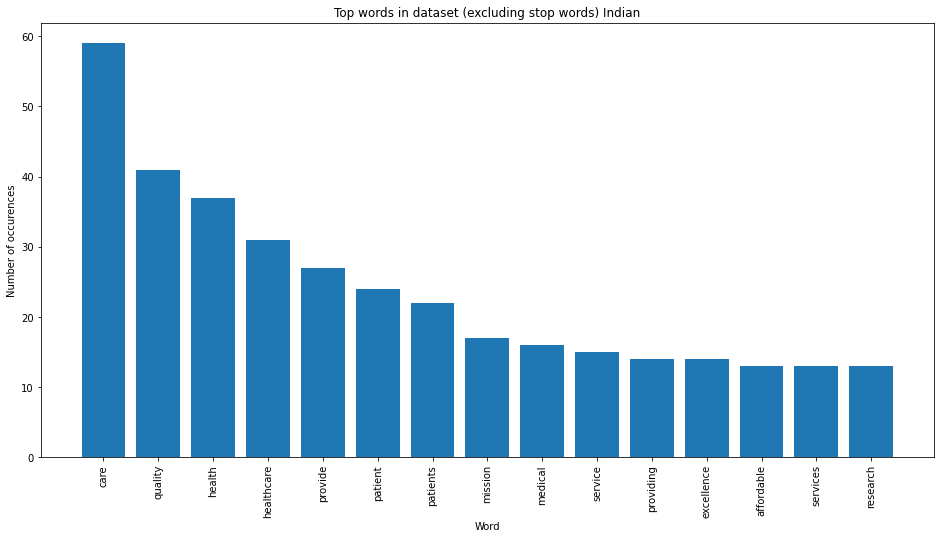

In [64]:
#Here we are tokenizing all the words and removing stop words


count_vectorizer = CountVectorizer(stop_words='english')

#Getting top words that are reapeating in the dataset

words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reind)



#Plotting a bar graph for top word present with its frequecies

#Giving an axis and specifing the size of graph
fig, ax = plt.subplots(figsize=(16,8))

#Giving the scale for the bar graph
ax.bar(range(len(words)), word_values);

#Sepcifing the values to print
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');

#Giving heading and x-y labes for the graphs
ax.set_title('Top words in dataset (excluding stop words) Indian');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

# Preprocessing of Data before Building the model

In [25]:
#These words are taken from frequecy_words top 15 words which are repeating


list2=["healthcare","excellence","patient","care","life","serve","technology","quality","people","mission","provide","health",
"providing","affordable","medical","community","service","research"]

In [26]:
# Load the regular expression library
import re
# Remove punctuation
df['headline_text_processed'] = \
df['headline_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['headline_text_processed'] = \
df['headline_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['headline_text_processed'].head()

0    to be a globally respected healthcare organiza...
1    to serve and enrich the quality of life of pat...
2    we believe that our mission is to provide high...
3    cipla’s mission is to be a leading global heal...
4    lupin's mission is to become a transnational p...
Name: headline_text_processed, dtype: object

In [27]:
#Removing unwanted double cotation

df['headline_text_processed']=df['headline_text_processed'].map(lambda x: re.sub('[“]', '', x))

In [28]:
#Removing unwanted single cotation

df['headline_text_processed']=df['headline_text_processed'].map(lambda x: re.sub('[’]', '', x))

WordCloud for Indian statement


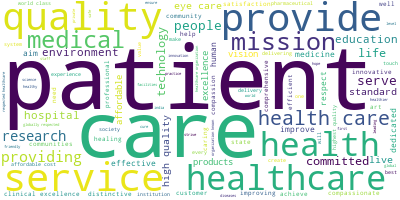

In [65]:
#Now lets find graphically using wordcloud graph what are most repeated words

#Words are which are in larger size are mostly repeated  

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['headline_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)

print("WordCloud for Indian statement")
# Visualize the word cloud
wordcloud.to_image()

In [30]:
#Now gensim libaray is loaded to check for words whic repeated most for our further process

import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','125'])

#Definations for converting or splitting all sentences to words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
#Removing all unwanted words by specifying a defination

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

#Converting all words which are obtaied after tokenization into list
data = df.headline_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['globally', 'respected', 'healthcare', 'organization', 'known', 'clinical', 'excellence', 'distinctive', 'patient', 'care']


In [31]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


# Dividing the CSV into topics

In [32]:
#Based on the words present all over the document identifying a patter the whole documet is classified as 5 types


from pprint import pprint
# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"quality" + 0.011*"care" + 0.011*"provide" + 0.011*"clinical" + '
  '0.010*"research" + 0.010*"healthcare" + 0.010*"products" + '
  '0.010*"excellence" + 0.009*"patient" + 0.009*"hope"'),
 (1,
  '0.030*"care" + 0.016*"health" + 0.012*"provide" + 0.011*"affordable" + '
  '0.011*"hospital" + 0.011*"patient" + 0.009*"medical" + 0.008*"healthcare" + '
  '0.008*"one" + 0.008*"mission"'),
 (2,
  '0.032*"care" + 0.028*"healthcare" + 0.025*"quality" + 0.020*"patient" + '
  '0.017*"health" + 0.013*"provide" + 0.011*"patients" + 0.011*"mission" + '
  '0.009*"service" + 0.009*"cost"'),
 (3,
  '0.026*"health" + 0.017*"care" + 0.015*"medical" + 0.014*"patients" + '
  '0.012*"committed" + 0.011*"providing" + 0.009*"best" + 0.009*"environment" '
  '+ 0.009*"quality" + 0.009*"provide"'),
 (4,
  '0.035*"care" + 0.031*"quality" + 0.015*"provide" + 0.015*"health" + '
  '0.013*"healthcare" + 0.012*"patients" + 0.011*"service" + 0.011*"people" + '
  '0.011*"services" + 0.010*"life"')]


In [33]:
#Preprocessing the dataset before we build a code 

#Importing library with tokenizer

from sklearn.feature_extraction.text import TfidfVectorizer

#Declare tokenzing vector varible 

tfidf_vect1 = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')

#Making matrix od=f words by tokenizing them

doc_term_matrix = tfidf_vect1.fit_transform(df['headline_text_processed'].values.astype('U'))

# Building NMF Model

In [37]:

#Importing nmf library
from sklearn.decomposition import NMF

#Declaring nmf variable
nmf = NMF(n_components=5, random_state=42)

#Fit the doc term matrix in nmf variable
nmf.fit(doc_term_matrix )

C:\Users\sumat\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\sumat\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=5, random_state=42)

In [38]:
#Classifying the varibles using doc_term_matrix

topic_values = nmf.transform(doc_term_matrix)

#Making a new column which contains classification type

df['Topic'] = topic_values.argmax(axis=1)

#Printing first 5 rows
df.head()

,headline_text,tokenization_of_sentences,headline_text_processed,Topic
0,To be a globally respected healthcare organiza...,"[globally, respected, healthcare, organization...",to be a globally respected healthcare organiza...,1
1,To serve and enrich the quality of life of pat...,"[serve, enrich, quality, life, patient, suffer...",to serve and enrich the quality of life of pat...,4
2,We believe that our mission is to provide high...,"[believe, mission, provide, high, quality, inn...",we believe that our mission is to provide high...,3
3,Cipla’s mission is to be a leading global heal...,"[cipla, mission, leading, global, healthcare, ...",ciplas mission is to be a leading global healt...,3
4,Lupin's mission is to become a transnational p...,"[lupin, mission, become, transnational, pharma...",lupin's mission is to become a transnational p...,3


In [63]:
df["tokenization_of_sentences"][4]

['lupin',
 'mission',
 'become',
 'transnational',
 'pharmaceutical',
 'company',
 'development',
 'introduction',
 'wide',
 'portfolio',
 'branded',
 'generic',
 'product',
 'key',
 'market']

# Building required table from Classification

In [39]:
#Now as we need table to get the probilities of words repeating in each topic. I have taken only tqo required columns
#which contains tokens and topic of classification

prob=df[["tokenization_of_sentences","Topic"]]

Topic 0

In [40]:

#Separating the values with 0 as independent dataframe

prob_0=prob[prob["Topic"]==0]

#Printing the shape

print(prob_0.shape)

print("************************************************************************************************************************")

#Code to get all the token in the lists of tokes

list1=[]
for i in prob_0["tokenization_of_sentences"]:
    for j in i:
        list1.append(j)

#Printing length of list1

print(len(list1))

#Converting list to dataframe

a_0=pd.DataFrame(list1)

#Getting value counts of each word in dataframe

b_0=pd.DataFrame(a_0[0].value_counts())

#Resetting the index

b_0=b_0.reset_index()

#Dropping duplicate rows

a_0.drop_duplicates().count()

b_0["probability"]=b_0[0]/301

print("************************************************************************************************************************")

#Top 5 largest probability with words related to it

print(b_0.nlargest(5, ['probability']))

#Getting top most priority words from list2

p1=b_0[b_0['index'].isin(list2)]

#Dropping unwanted column

p1=p1.drop([0],axis=1)


print("************************************************************************************************************************")

print(p1)

print("************************************************************************************************************************")

#Resetting the index as in further steps we merge the dataset , if we dont merge the data the it may lead to wrong match based
#on row numbers

p1=p1.reset_index()

print(p1)


(18, 2)
************************************************************************************************************************
311
************************************************************************************************************************
     index   0  probability
0     care  21     0.069767
1  patient  12     0.039867
2      eye  11     0.036545
3  provide   9     0.029900
4  quality   9     0.029900
************************************************************************************************************************
          index  probability
0          care     0.069767
1       patient     0.039867
3       provide     0.029900
4       quality     0.029900
7       service     0.023256
8     providing     0.019934
9       medical     0.019934
12   technology     0.016611
15     research     0.009967
16       health     0.009967
42   affordable     0.006645
58   healthcare     0.003322
79   excellence     0.003322
103        life     0.003322
128     mission     0.

Topic 1

In [41]:
#Separating the values with 1 as independent dataframe

prob_1=prob[prob["Topic"]==1]

#Printing the shape

print(prob_1.shape)

print("************************************************************************************************************************")

#Code to get all the token in the lists of tokes

list3=[]
for i in prob_1["tokenization_of_sentences"]:
    for j in i:
        list3.append(j)
        
#Printing length of list2

print(len(list3))

a_1=pd.DataFrame(list3)
b_1=pd.DataFrame(a_1[0].value_counts())

b_1=b_1.reset_index()

print(a_1.drop_duplicates().count())

#Getting value counts of each word in dataframe

b_1["probability"]=b_1[0]/196

print("************************************************************************************************************************")

#Top 5 largest probability with words related to it

print(b_1.nlargest(5, ['probability']))

#Getting top most priority words from list2

p2=b_1[b_1['index'].isin(list2)]


#Drop unwanted columns

p2=p2.drop([0],axis=1)

print("************************************************************************************************************************")

print(p2)



print("************************************************************************************************************************")

#Resetting the index as in further steps we merge the dataset , if we dont merge the data the it may lead to wrong match based
#on row numbers


p2=p2.reset_index()
print(p2)



(8, 2)
************************************************************************************************************************
94
0    48
dtype: int64
************************************************************************************************************************
        index  0  probability
0    clinical  8     0.040816
1  excellence  8     0.040816
2        care  7     0.035714
3     patient  7     0.035714
4  healthcare  5     0.025510
************************************************************************************************************************
         index  probability
1   excellence     0.040816
2         care     0.035714
3      patient     0.035714
4   healthcare     0.025510
11   community     0.005102
16     provide     0.005102
20    research     0.005102
25     medical     0.005102
33     quality     0.005102
34        life     0.005102
35       serve     0.005102
38     service     0.005102
**************************************************************

Topic 2

In [42]:
#Separating the values with 2 as independent dataframe

prob_2=prob[prob["Topic"]==2]

#Printing the shape
print(prob_2.shape)

print("************************************************************************************************************************")


#Code to get all the token in the lists of tokes
list4=[]
for i in prob_2["tokenization_of_sentences"]:
    for j in i:
        list4.append(j)

print(len(list4))

a_2=pd.DataFrame(list4)
b_2=pd.DataFrame(a_2[0].value_counts())

b_2=b_2.reset_index()

#Getting value counts of each word in dataframe

print(a_2.drop_duplicates().count())


# Getting the probability

b_2["probability"]=b_2[0]/372

print("************************************************************************************************************************")

#Top 5 largest probability with words related to it

print(b_2.nlargest(5, ['probability']))

#Getting top most priority words from list2

p3=b_2[b_2['index'].isin(list2)]

print("************************************************************************************************************************")

print(p3)

#Drop unwanted columns

p3=p3.drop([0],axis=1)


print("************************************************************************************************************************")

#Resetting the index as in further steps we merge the dataset , if we dont merge the data the it may lead to wrong match based
#on row numbers

p3=p3.reset_index()
print(p3)


(25, 2)
************************************************************************************************************************
407
0    245
dtype: int64
************************************************************************************************************************
       index   0  probability
0     health  32     0.086022
1       care  19     0.051075
2    service  11     0.029570
3    quality  10     0.026882
4  education   6     0.016129
************************************************************************************************************************
          index   0  probability
0        health  32     0.086022
1          care  19     0.051075
2       service  11     0.029570
3       quality  10     0.026882
5     community   6     0.016129
6       patient   5     0.013441
8      research   5     0.013441
10      mission   4     0.010753
11    providing   4     0.010753
22        serve   3     0.008065
35       people   2     0.005376
37      provide   2     0.0

Topic 3

In [43]:
#Separating the values with 3 as independent dataframe

prob_3=prob[prob["Topic"]==3]

#Printing the shape

print(prob_3.shape)

print("************************************************************************************************************************")

#Code to get all the token in the lists of tokes

list5=[]
for i in prob_3["tokenization_of_sentences"]:
    for j in i:
        list5.append(j)

#Printing the list5 length

print(len(list5))

#Building the dataframe
a_3=pd.DataFrame(list5)

#Getting value_counts of dataframe

b_3=pd.DataFrame(a_3[0].value_counts())

b_3=b_3.reset_index()

#Getting value counts of each word in dataframe

print(a_3.drop_duplicates().count())

#Getting the probablility of words

b_3["probability"]=b_3[0]/253

print("************************************************************************************************************************")

print(b_3.nlargest(5, ['probability']))

#Getting top most priority words from list2

p4=b_3[b_3['index'].isin(list2)]

print("************************************************************************************************************************")

print(p4)

#Drop unwanted columns

p4=p4.drop([0],axis=1)


#Resetting the index as in further steps we merge the dataset , if we dont merge the data the it may lead to wrong match based
#on row numbers

print("************************************************************************************************************************")
p4=p4.reset_index()

print(p4)




(26, 2)
************************************************************************************************************************
494
0    312
dtype: int64
************************************************************************************************************************
            index   0  probability
0         mission  12     0.047431
1      healthcare  12     0.047431
2          people   9     0.035573
3            life   8     0.031621
4  pharmaceutical   8     0.031621
************************************************************************************************************************
          index   0  probability
0       mission  12     0.047431
1    healthcare  12     0.047431
2        people   9     0.035573
3          life   8     0.031621
6       patient   6     0.023715
7       quality   6     0.023715
10      medical   5     0.019763
11   technology   5     0.019763
18      provide   3     0.011858
47        serve   2     0.007905
51       health   2     0.0079

Topic 4

In [44]:
#Separating the values with 4 as independent dataframe

prob_4=prob[prob["Topic"]==4]

#Printing the shape
print(prob_4.shape)

print("************************************************************************************************************************")

#Code to get all the token in the lists of tokes

list6=[]
for i in prob_4["tokenization_of_sentences"]:
    for j in i:
        list6.append(j)

#Printing the list6 length

print(len(list6))

#Building the dataframe
a_4=pd.DataFrame(list6)

#Getting value counts of the dataframe
b_4=pd.DataFrame(a_4[0].value_counts())

#Resetting the index of the Dataframe

b_4=b_4.reset_index()

#Dropping duplicates in a dataframe

print(a_4.drop_duplicates().count())

#Finding Probabilities in dataframe
b_4["probability"]=b_4[0]/536

print("************************************************************************************************************************")

print(b_4.nlargest(5, ['probability']))

#Getting top most priority words from list2

p5=b_4[b_4['index'].isin(list2)]

print("************************************************************************************************************************")

print(p5)

#Drop unwanted columns 

p5=p5.drop([0],axis=1)


print("************************************************************************************************************************")

#Resetting the index as in further steps we merge the dataset , if we dont merge the data the it may lead to wrong match based
#on row numbers

p5=p5.reset_index()

print(p5)




(22, 2)
************************************************************************************************************************
346
0    167
dtype: int64
************************************************************************************************************************
        index   0  probability
0     patient  16     0.029851
1     quality  15     0.027985
2     provide  12     0.022388
3  healthcare  12     0.022388
4        care  10     0.018657
************************************************************************************************************************
         index   0  probability
0      patient  16     0.029851
1      quality  15     0.027985
2      provide  12     0.022388
3   healthcare  12     0.022388
4         care  10     0.018657
5      service   9     0.016791
6   affordable   8     0.014925
8         life   6     0.011194
9        serve   5     0.009328
11   community   5     0.009328
17    research   3     0.005597
22   providing   3     0.005597
2

# Droping Unwated columns in probability datasets

In [45]:
#Droping unwanted level_0 column

p1=p1.drop(["level_0"],axis=1)

In [46]:
#Droping unwanted level_0 column

p2=p2.drop(["level_0"],axis=1)

In [47]:
#Droping unwanted level_0 column

p3=p3.drop(["level_0"],axis=1)

In [48]:
#Droping unwanted level_0 column

p4=p4.drop(["level_0"],axis=1)

In [49]:
#Droping unwanted level_0 column

p5=p5.drop(["level_0"],axis=1)

In [50]:
#main_list=frequecy_words.reset_index()
#main_list=main_list["index"].to_list()

# Renaming the columns of pobability dataset

In [51]:
#Renaming the columns

p1.columns=["index","probability_type0"]
p2.columns=["index","probability_type1"]
p3.columns=["index","probability_type2"]
p4.columns=["index","probability_type3"]
p5.columns=["index","probability_type4"]

# Merging the required data for obtaing the table required for probabilites of word in each topic

In [52]:
#Resetting the index for frequency_words
 
fq=frequecy_words.reset_index()

In [53]:
#Checking for top 15 words in frequency count table from list2

fq_count=fq[fq["index"].isin(list2)].reset_index()

In [54]:
#Dropping unwanted level_0 Column

fq_count.drop(["level_0"],axis=1,inplace=True)

In [55]:
#Merging on index fequecy and m1

m1=pd.merge(fq_count,p1, on=["index"],how="left")

In [56]:
#Merginh m2 and p2

m2=pd.merge(m1,p2, on=["index"],how="left")

In [57]:
#merging m2 and p3

m3=pd.merge(m2,p3, on=["index"],how="left")

In [58]:
#Merging m3 and p4

m4=pd.merge(m3,p4, on=["index"],how="left")

In [59]:
#merging m4 and p5

m5=pd.merge(m4,p5, on=["index"],how="left")

In [60]:
#Filling all na values with 0

req_table_of_probabilities_indian=m5.fillna(0)

In [61]:
#Printing required table

req_table_of_probabilities_indian

,index,frequency,probability_type0,probability_type1,probability_type2,probability_type3,probability_type4
0,healthcare,31.0,0.003322,0.025510,0.002688,0.047431,0.022388
1,excellence,14.0,0.003322,0.040816,0.005376,0.000000,0.005597
2,patient,46.0,0.039867,0.035714,0.013441,0.023715,0.029851
3,care,59.0,0.069767,0.035714,0.051075,0.007905,0.018657
4,life,18.0,0.003322,0.005102,0.005376,0.031621,0.011194
5,serve,12.0,0.003322,0.005102,0.008065,0.007905,0.009328
6,technology,13.0,0.016611,0.000000,0.002688,0.019763,0.003731
7,quality,41.0,0.029900,0.005102,0.026882,0.023715,0.027985
8,people,12.0,0.000000,0.000000,0.005376,0.035573,0.001866
9,mission,17.0,0.003322,0.000000,0.010753,0.047431,0.000000
